Trying the Prana Exercise with our Dataset

In [1]:
%config IPCompleter.greedy=True
from sklearn import datasets
from sklearn import preprocessing
import pandas as pd
import numpy as np
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import process_csv_data
import betting
import numpy as np
import csv

In [2]:
mySet = pd.read_csv('../data/sliding01.csv')

In [3]:
df = mySet

In [4]:
df.head(10)

,Unnamed: 0,result,odds-home,odds-draw,odds-away,home-wins,home-draws,home-losses,home-goals,home-opposition-goals,away-wins,away-draws,away-losses,away-goals,away-opposition-goals
0,0,H,1.36,4.50,9.00,5,3,2,14,10,2,2,6,8,14
1,1,D,2.25,3.00,3.50,3,4,3,16,12,4,3,3,14,12
2,2,D,2.80,3.00,2.70,5,2,3,10,8,4,4,2,15,13
3,3,A,1.91,3.25,4.33,5,3,2,18,11,3,3,4,10,11
4,4,H,2.10,3.00,4.00,2,4,4,6,9,1,6,3,7,10
5,5,D,3.60,3.00,2.20,3,1,6,7,16,5,4,1,20,13
6,6,A,1.75,3.25,5.50,5,2,3,12,9,5,3,2,9,8
7,7,A,1.73,3.25,5.50,3,1,6,6,10,2,3,5,10,14
8,8,A,5.25,3.30,1.75,0,6,4,10,14,6,3,1,14,8
9,9,D,2.75,3.00,2.75,2,1,7,8,16,3,6,1,13,9


In [5]:
le = preprocessing.LabelEncoder()
le.fit([ "A", "D", "H"])
df.loc[:,['result']]=le.transform(df['result'])
feature_cols=['odds-home','odds-draw','odds-away','home-wins','home-draws','home-losses','home-goals','home-oposition-goals','away-wins','away-draws','away-losses','away-goals','away-opposition-goals']
df.head()

,Unnamed: 0,result,odds-home,odds-draw,odds-away,home-wins,home-draws,home-losses,home-goals,home-opposition-goals,away-wins,away-draws,away-losses,away-goals,away-opposition-goals
0,0,2,1.36,4.50,9.00,5,3,2,14,10,2,2,6,8,14
1,1,1,2.25,3.00,3.50,3,4,3,16,12,4,3,3,14,12
2,2,1,2.80,3.00,2.70,5,2,3,10,8,4,4,2,15,13
3,3,0,1.91,3.25,4.33,5,3,2,18,11,3,3,4,10,11
4,4,2,2.10,3.00,4.00,2,4,4,6,9,1,6,3,7,10


In [6]:
y = df['result']
X = df.iloc[:, [2,3,4,5,6,7,8,9,10,11,12,13,14]]

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.3, random_state=0)

In [8]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=5, random_state=0)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [9]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5346566351848887


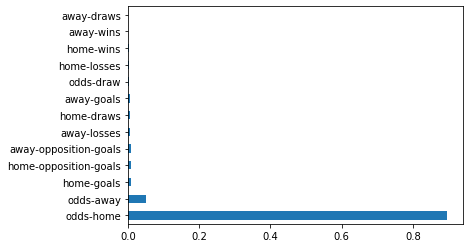

In [10]:
import matplotlib.pyplot as plt
feat_importances = pd.Series(clf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(13).plot(kind='barh')
plt.show()

In [11]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

C:\Users\Lisa\Anaconda3\envs\PRANA\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


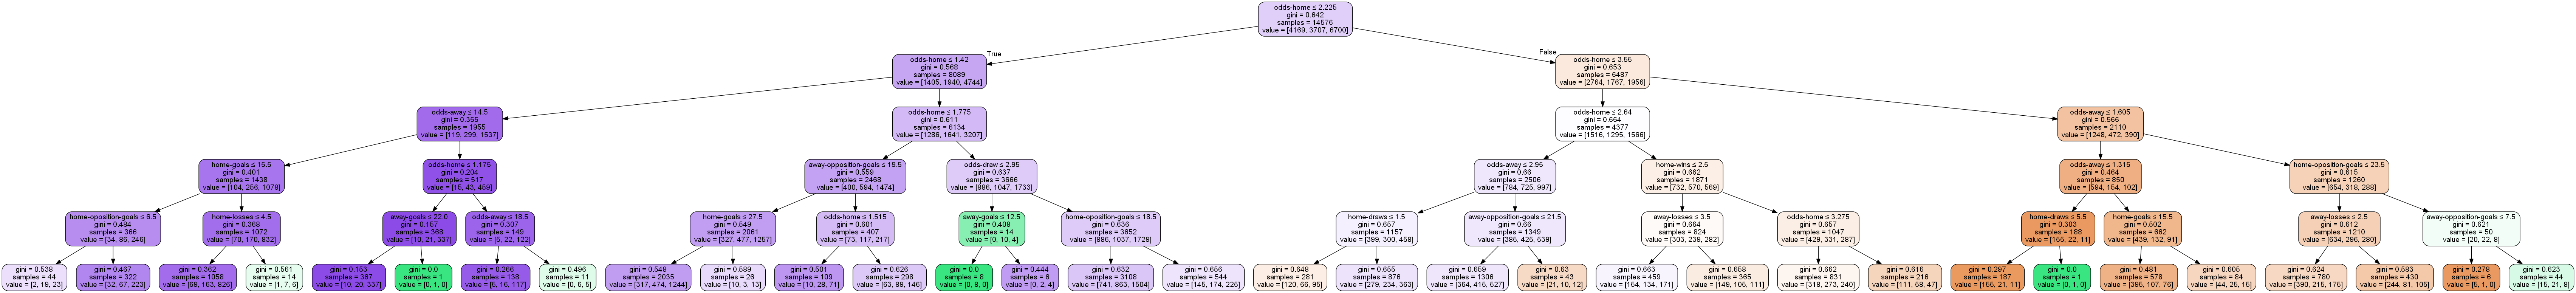

In [12]:

dot_data = StringIO()
export_graphviz(clf, 
                out_file=dot_data, 
                feature_names=feature_cols,filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph.write_pdf("tree.pdf")
Image(graph.create_png())

For Sergej without the Important Columns :D

In [13]:
y = df['result']
X = df.iloc[:, [4,5,6,7,8,9,10,11,12,13]]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.3, random_state=0)

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=5, random_state=0)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5317752521210181


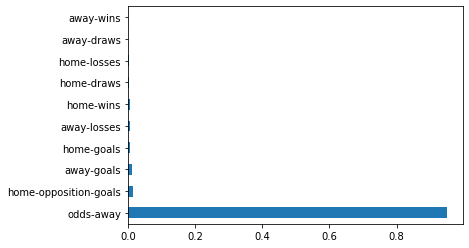

In [15]:
import matplotlib.pyplot as plt
feat_importances = pd.Series(clf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

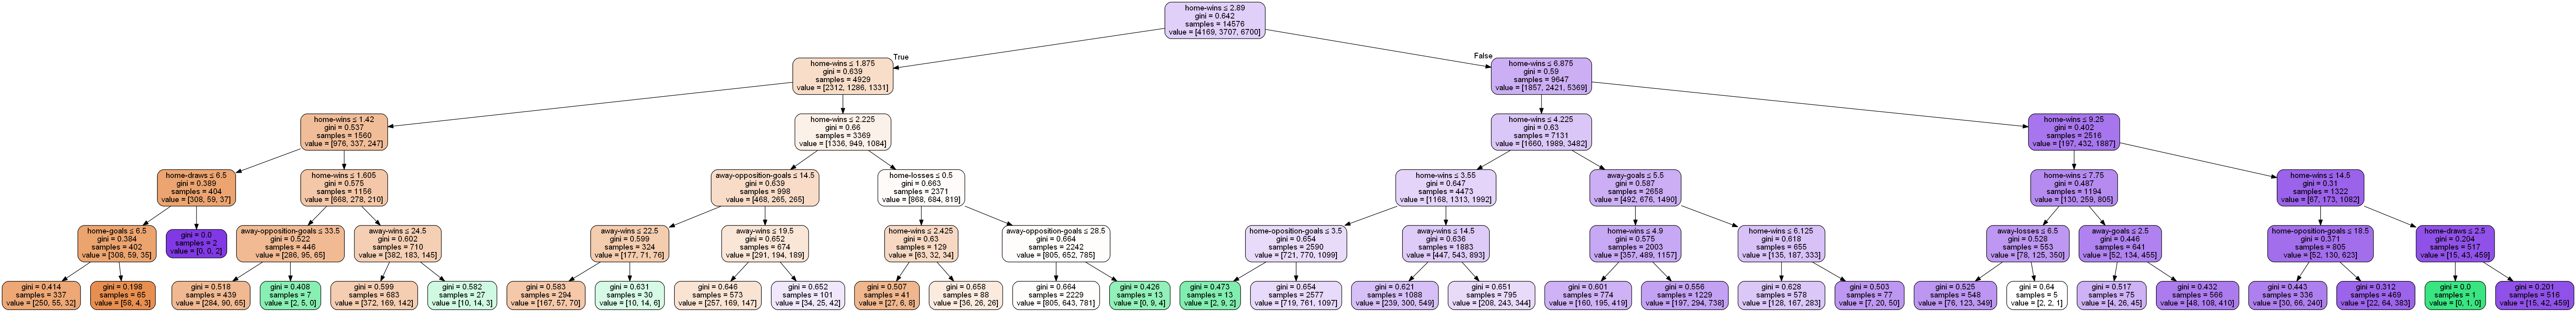

In [16]:
feature_cols=['home-wins','home-draws','home-losses','home-goals','home-oposition-goals','away-wins','away-draws','away-losses','away-goals','away-opposition-goals']
dot_data = StringIO()
export_graphviz(clf, 
                out_file=dot_data, 
                feature_names=feature_cols,filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())